# **Project Purpose**

The purpose of this project was to create a CNN model to classify tomato leaves as healthy or infected with bacterial spots. This helps in early disease detection, improving tomato crop management and yield. The model achieved 100% test accuracy, proving it can effectively identify diseased leaves and help farmers take timely action to protect their crops.

**Import Libraries** 

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image,ImageFilter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,  MaxPooling2D, Flatten, Dense, Dropout

In [2]:
Tomato_Bacterial_spot_files = os.listdir(r"Tomato Plant Health & Issues\Tomato_Bacterial_spot")
Tomato_healthy_files= os.listdir(r"Tomato Plant Health & Issues\Tomato_healthy")

In [3]:
Tomato_Bacterial_spot= Tomato_Bacterial_spot_files[:5]
Tomato_healthy = Tomato_healthy_files[:5]
print(len(Tomato_Bacterial_spot))
print(len(Tomato_healthy))

5
5


In [4]:
Tomato_Bacterial_lables = [1]*len(Tomato_Bacterial_spot_files)
Tomato_healthy_lables = [0]*len(Tomato_healthy_files)
print("Tomato_Bacterial_Lables:",Tomato_Bacterial_lables[0:10] )
print("Tomato_healthy:",Tomato_healthy_lables[0:10])

Tomato_Bacterial_Lables: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Tomato_healthy: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
Lables = Tomato_Bacterial_lables + Tomato_healthy_lables

In [6]:
Tomato_Bacterial_spot = r"Tomato Plant Health & Issues\Tomato_Bacterial_spot"

data = []

for img_file in Tomato_Bacterial_spot_files:
    img_path = os.path.join(Tomato_Bacterial_spot, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    data.append(image)

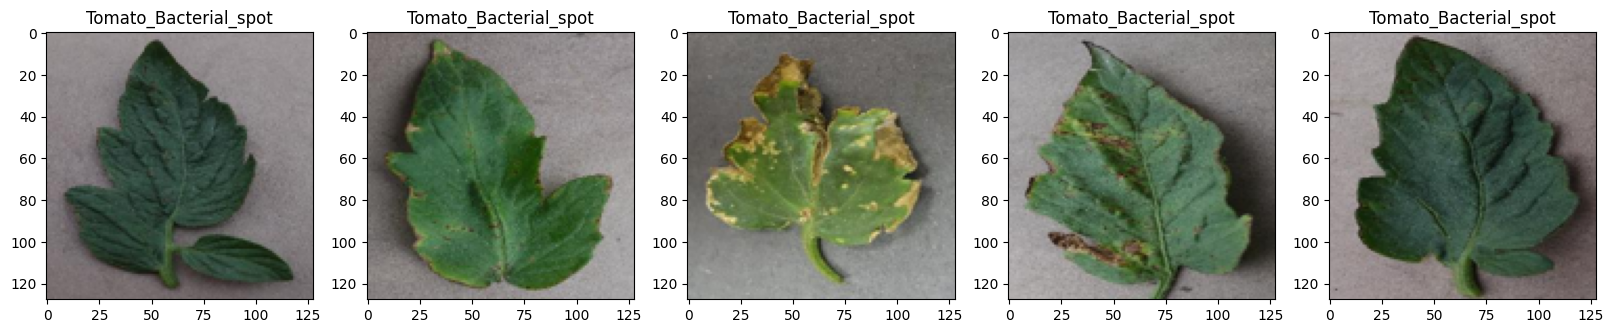

In [7]:
plt.figure(figsize=(20,20))
for i in range(min(5,len(data))):
    plt.subplot(1,5,i+1)
    plt.imshow(data[i])
    plt.title('Tomato_Bacterial_spot')

In [8]:
Tomato_healthy = r"Tomato Plant Health & Issues\Tomato_healthy"

data = []


for img_file in Tomato_healthy_files:
    img_path = os.path.join(Tomato_healthy, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128)) 
    image = image.convert('RGB')
    data.append(image)

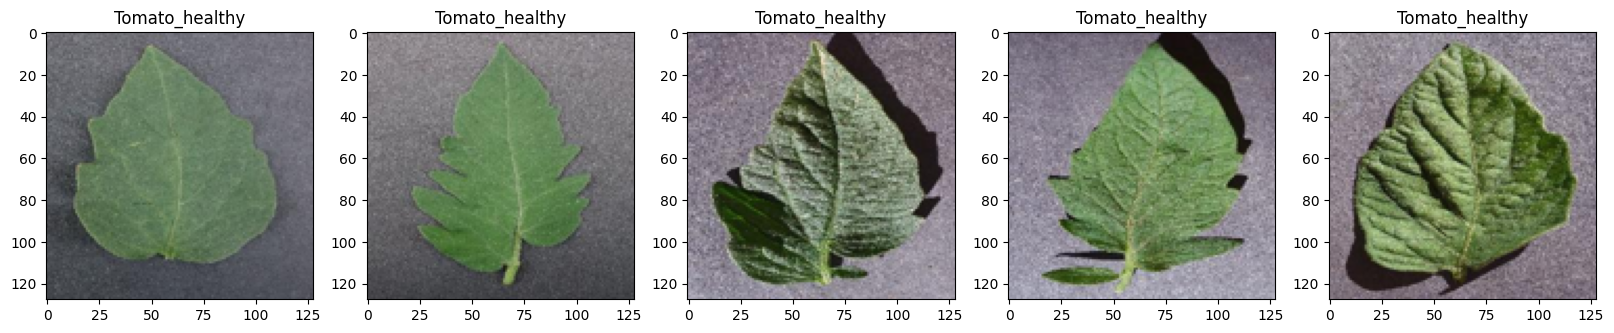

In [9]:
plt.figure(figsize =(20,20))
for i in range(min(5,len(data))):
    plt.subplot(1,5,i+1)
    plt.imshow(data[i])
    plt.title('Tomato_healthy')

In [10]:
Tomato_Bacterial_spot = r"Tomato Plant Health & Issues\Tomato_Bacterial_spot"

data = []

for img_file in Tomato_Bacterial_spot_files:
    img_path = os.path.join(Tomato_Bacterial_spot, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    data.append(image)
    
    Tomato_healthy = r"Tomato Plant Health & Issues\Tomato_healthy"


for img_file in Tomato_healthy_files:
    img_path = os.path.join(Tomato_healthy, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128)) 
    image = image.convert('RGB')
    data.append(image)

In [11]:
X = np.array(data)
y = np.array(Lables)

In [12]:
print(X.shape)
print(y.shape)

(3718, 128, 128, 3)
(3718,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (2974, 128, 128, 3)
Shape of Y_train is: (2974,)

Shape of X_test is: (744, 128, 128, 3)
Shape of Y_test is: (744,)


In [15]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [16]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(128, 128, 3),  activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64,(3,3),  activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64,(3,3),  activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train_scale, Y_train, epochs=10, validation_data=(X_test_scale, Y_test))

Epoch 1/10


93/93 [==============================] - 47s 437ms/step - loss: 0.3618 - accuracy: 0.8100 - val_loss: 0.0377 - val_accuracy: 0.9946
Epoch 2/10
93/93 [==============================] - 36s 388ms/step - loss: 0.0564 - accuracy: 0.9859 - val_loss: 0.0201 - val_accuracy: 0.9919
Epoch 3/10
93/93 [==============================] - 43s 457ms/step - loss: 0.0237 - accuracy: 0.9956 - val_loss: 0.0140 - val_accuracy: 0.9919
Epoch 4/10
93/93 [==============================] - 36s 387ms/step - loss: 0.0311 - accuracy: 0.9933 - val_loss: 0.0085 - val_accuracy: 0.9960
Epoch 5/10
93/93 [==============================] - 37s 403ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.0021 - val_accuracy: 0.9987
Epoch 6/10
93/93 [==============================] - 37s 394ms/step - loss: 0.0130 - accuracy: 0.9946 - val_loss: 0.0112 - val_accuracy: 0.9933
Epoch 7/10
93/93 [==============================] - 35s 382ms/step - loss: 0.0264 - accuracy: 0.9896 - val_loss: 8.2492e-04 - val_accuracy: 

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scale, Y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

24/24 - 2s - loss: 4.5406e-05 - accuracy: 1.0000 - 2s/epoch - 87ms/step
Test accuracy: 1.0


In [22]:
y_pred_probs = model.predict(X_test_scale)


threshold = 0.5
y_pred = (y_pred_probs >= threshold).astype(int).flatten()

24/24 [==============================] - 2s 84ms/step


In [24]:
report = classification_report(Y_test, y_pred, target_names=['Healthy', 'Bacterial Spot'])
print(report)

                precision    recall  f1-score   support

       Healthy       1.00      1.00      1.00       332
Bacterial Spot       1.00      1.00      1.00       412

      accuracy                           1.00       744
     macro avg       1.00      1.00      1.00       744
  weighted avg       1.00      1.00      1.00       744



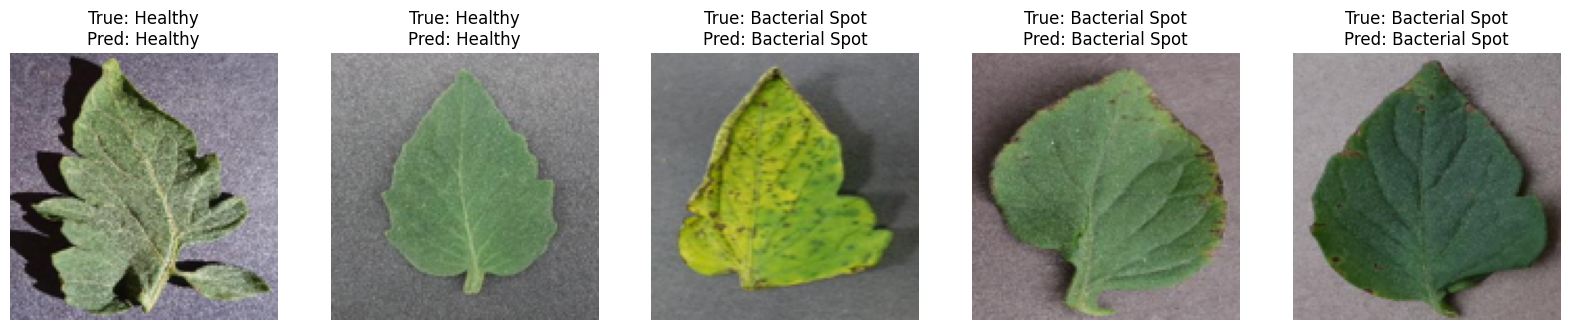

In [26]:

def plot_sample_predictions(X, y_true, y_pred, class_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(X[i])
        true_label = class_names[y_true[i]]
        pred_label = class_names[y_pred[i]]
        ax.set_title(f'True: {true_label}\nPred: {pred_label}')
        ax.axis('off')
    plt.show()


plot_sample_predictions(X_test, Y_test, y_pred.astype(int), ['Healthy', 'Bacterial Spot'])